In [1]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus.reader import PlaintextCorpusReader
import string
import re # regular expression library
import csv
import sys
import pandas as pd
import matplotlib as mpl

In [2]:
corpus = PlaintextCorpusReader("/Users/geomando/Dropbox/github/CREW_plan_crosswalk/all_plans", '.*\.txt',encoding="utf8")
corpus.fileids()

['bc.txt',
 'ca.txt',
 'crew.txt',
 'la.txt',
 'nist.txt',
 'orp.txt',
 'rws.txt',
 'spur.txt']

In [3]:
def clean_words(words):
    punctuations = list(string.punctuation) + ["''",'...']

# multi-word strings only there to keep track of what phrases were manually deleted from files
    all_plans_stop_words = ['san','francisco', 'spur', 'degenkolb', 'oregon', 'washington','earthquake',
                        'california','los', 'angeles','mineral','february','http','www', 'british','columbia','canada',
                        '2014','2015','2016','2017','riverbend','united states','york','://','2003','simeon',
                        'shakeout','image','noaa','ngdc','mendocino','survey','org','january','cruz','golden','cascadia',
                        'orleans','prieta','geology','2013','auditor','march','version','fema','volumes','guide', '1994 ',
                        'northridge','adelman','american','andreas','usgs','gov','background','northwest','plate','crescent',
                        'nisqually','maule','courthouse','tohoku','San Francisco Planning + Urban Research Association etc',
                        'bay area','solid ground','WAEMD etc','Oregon Seismic Safety Policy Advisory Commission', 'osspac'
                        'department of geology and gineral industries','california Seismic Safety Commission',
                        'Mayors Seismic Safety Task Force','task group','earthquake','seismic',
                        'Governors Office of Emergency Services','x','1','(',')',').','1','2','3','4','5','6','7','8','9',
                        'also','would','within','need','),','many','90','following','use','may','13','likely','must',
                        'level','based','r','].','.,','e','y','g','o','figure','table','0','large','along',
                        'could','one','example','2011','north','great','far','photo','much','d','2008','report','order',
                        'shall','retrieved','department','southern','dwp','000','could','report','major','post','percent',
                        'department','60','15','pep','bc','embcs','general','make','task','group','oregons','embc',
                        'earthquakes','california','quake','plates']

    recs_stop_words = ['san','francisco', 'spur', 'degenkolb']
    stop_words = stopwords.words('english') + recs_stop_words + punctuations
    
    return [w.lower() for w in words if w.lower() not in stop_words]

In [4]:
filename = 'collocations_of_resilience_concordances.txt'

# Open the file
filecolloc = open(filename, 'w')
# Save old stdout stream
tmpout = sys.stdout
# Redirect all "print" calls to that file
sys.stdout = filecolloc

words = corpus.words()
words_clean = clean_words(words)
text = nltk.Text(words_clean)
# print '\n', 'All files'
print('\n', 'All files')
text.collocations(num=50)

for fileid in corpus.fileids():
    words = corpus.words(fileid)
    words_clean = clean_words(words)
    text = nltk.Text(words_clean)
#     print '\n', fileid
    print('\n', fileid)
    text.collocations(num=50)
    
# Close file
filecolloc.close()
# Reset stdout in case you need something else to print
sys.stdout = tmpout

In [5]:

concord_word = 'resilience' # word to find concordances for
concord_lines = 1200 # number of output lines/concordances
concord_context = 100 # number of characters extracted from left and right of concord_word



for fileid in corpus.fileids():
    filename = 'concord_' + fileid
    # Open the file
    fileconcord = open(filename, 'w')
    # Save old stdout stream
    tmpout = sys.stdout
    # Redirect all "print" calls to that file
    sys.stdout = fileconcord
    words = corpus.words(fileid)
    text = nltk.Text(words)
    #print '\n', fileid
    text.concordance(concord_word, concord_context, concord_lines)
    # Close file
    fileconcord.close()
    # Reset stdout in case you need something else to print
    sys.stdout = tmpout       

In [6]:
# [w for w in spur if re.search('structure$', w)][:10]

In [7]:
# [w for w in words_nltk if re.search('^re', w)][0:10]

In [8]:
# [w for w in corpus.words() if re.search('and*', w)]

In [9]:

# [w for w in corpus.words() if len(w) >= 15]

In [10]:
#corpus.words().count('resilience')
len(clean_words(corpus.words()))

301177

In [11]:
# #len(corpus.words())
# nist = corpus.words('nist_both_volumes.txt')
# clean_nist = clean_words(nist)
# fd_nist = nltk.FreqDist(clean_nist)
# fd_nist.max

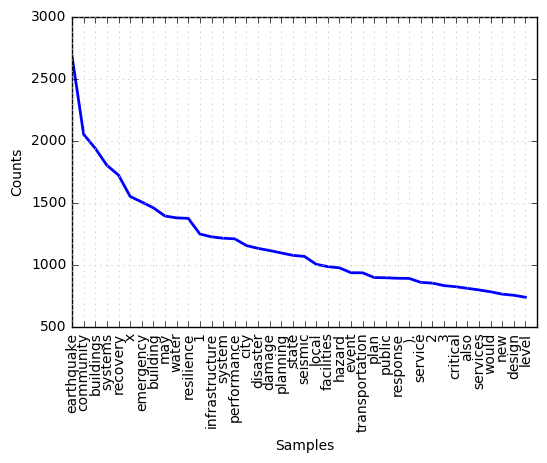

In [12]:
fd = nltk.FreqDist(clean_words(corpus.words()))

# rcParams['axes.labelsize'] = '20'
# tick_params(axis='both', labelsize=20)
# figsize(20,10)

fig = fd.plot(40,cumulative=False)

In [13]:
# fd = nltk.FreqDist(clean_words(corpus.words('lifelines_recs/rws_lifelines_recs.txt')))

# rcParams['axes.labelsize'] = '20'
# tick_params(axis='both', labelsize=20)
# figsize(20,10)

# fig = fd.plot(40,cumulative=False)

In [14]:
corpus_freq_table = pd.DataFrame(fd.items())
corpus_freq_table.sort(columns=1, axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
corpus_freq_table.columns = ['Word', 'Count']
corpus_freq_table.reset_index(drop=True, inplace=True)
corpus_freq_table[:5]


PandasError: DataFrame constructor not properly called!

In [ ]:
corpus_freq_table['Per Thousand'] = 1000*(corpus_freq_table['Count'] / corpus_freq_table['Count'].sum())

In [ ]:
fig, ax = subplots()
#minorFormatter = IndexFormatter
#minorLocator = MultipleLocator(1)

corpus_freq_table[:25].plot(ax=ax, x='Word',y='Per Thousand',legend=False,rot=90, kind='bar')

In [ ]:
phase_words = ['preparedness','response','mitigation','restoration','recovery',
              'time','days','weeks','months','years']
              
action_words = ['performance','goals','recommendations','policy','plan','design','retrofit']
              
people_words = ['city','local','rural','state','national','community','public','social','health','economic','businesses']
              
thing_words = ['housing','buildings','schools','hospitals','facilities','structures',
              'infrastructure','transportation','roads','bridges',
              'utilities','energy','electric','power','fuel','gas',
              'water','wastewater','communications'
             ]

dispersion_words = ['DISASTER PHASE','resilience','preparedness','response','mitigation','recovery',
                   'GOVERNMENT LEVEL','community','city','local','state','public',
                    'CRITICAL SERVICES','social','health','economic','schools','hospitals','facilities',
                   'BUILDINGS AND HOUSING','housing','buildings','structures',
                    'LIFELINE INFRASTRUCTURE','transportation','roads','bridges','transit',
                    'utilities','power','gas','water','wastewater']


disp_title = ''

PHASE WORDS

In [ ]:
fig, ax = subplots()
rcParams['axes.labelsize'] = '20'
tick_params(axis='both', labelsize=20)
#figsize(20,5)
nltk.draw.dispersion_plot(clean_words(corpus.words()),dispersion_words,
                         title=disp_title)

In [ ]:
filename = 'crew.txt'

fig, ax = subplots()
rcParams['axes.labelsize'] = '20'
tick_params(axis='both', labelsize=20)
figsize(20,16)
xlim(0,7500)
nltk.draw.dispersion_plot(clean_words(corpus.words(filename)),dispersion_words,
                         title=disp_title)

action_words

In [ ]:
fig, ax = subplots()
rcParams['axes.labelsize'] = '20'
tick_params(axis='both', labelsize=20)
figsize(20,4)
nltk.draw.dispersion_plot(clean_words(corpus.words()),action_words,
                         title=disp_title)

In [ ]:
filename = 'la.txt'

fig, ax = subplots()
rcParams['axes.labelsize'] = '20'
tick_params(axis='both', labelsize=20)
figsize(20,4)
nltk.draw.dispersion_plot(clean_words(corpus.words(filename)),action_words,
                         title=disp_title)

people_words

In [ ]:
fig, ax = subplots()
rcParams['axes.labelsize'] = '20'
tick_params(axis='both', labelsize=20)
figsize(20,5)
nltk.draw.dispersion_plot(clean_words(corpus.words()),people_words,
                         title=disp_title)

In [ ]:
filename = 'spur.txt'

fig, ax = subplots()
rcParams['axes.labelsize'] = '20'
tick_params(axis='both', labelsize=20)
figsize(20,5)
nltk.draw.dispersion_plot(clean_words(corpus.words(filename)),people_words,
                         title=disp_title)

thing_words

In [ ]:
fig, ax = subplots()
rcParams['axes.labelsize'] = '20'
tick_params(axis='both', labelsize=20)
figsize(20,10)
nltk.draw.dispersion_plot(clean_words(corpus.words()),thing_words,
                         title=disp_title)

In [ ]:
filename = 'spur.txt'

fig, ax = subplots()
rcParams['axes.labelsize'] = '20'
tick_params(axis='both', labelsize=20)
figsize(20,10)
nltk.draw.dispersion_plot(clean_words(corpus.words(filename)),thing_words,
                         title=disp_title)

In [ ]:
fd = nltk.FreqDist(clean_words(corpus.words('nist_both_volumes.txt')))

In [ ]:
fd.

In [ ]:
corpus_freq_table = pd.DataFrame(fd.items())
corpus_freq_table.sort(columns=1, axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
corpus_freq_table.columns = ['Word', 'Count']
corpus_freq_table.reset_index(drop=True, inplace=True)
corpus_freq_table['Word'] = corpus_freq_table['Word'].astype(str)

corpus_freq_table['Percent'] = corpus_freq_table['Count'] / corpus_freq_table['Count'].sum()
corpus_freq_table[:5]